# Problem Statement: Segment users based on their advertisement behaviors and characteristics.

In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Kuldeep'

In [4]:
os.chdir("C:/Users/Kuldeep/Desktop/cdac mumbai new")

In [5]:
df=pd.read_csv("vehicles.csv")    #read the file

In [6]:
df.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [7]:
df.shape

(258888, 26)

In [8]:
df.columns

Index(['ad_title', 'ad_description', 'details', 'slug', 'title', 'type',
       'price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'properties', 'user'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [10]:
df.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [11]:
df=df.drop(['details','member_since'],axis=1)

In [12]:
df.shape

(258888, 24)

In [13]:
#dropping all remaining null values
df=df.dropna()

In [14]:
df.isnull().sum()

ad_title                0
ad_description          0
slug                    0
title                   0
type                    0
price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
properties              0
user                    0
dtype: int64

In [15]:
df['category'].unique()    #checking of all unique category

array(['Auto Parts & Accessories', 'Cars', 'Auto Services', 'Rentals',
       'Vans', 'Lorries & Trucks', 'Three Wheelers', 'Motorbikes',
       'Buses', 'Heavy Duty', 'Tractors', 'Bicycles',
       'Boats & Water Transport'], dtype=object)

In [16]:
df1=df.drop(df[(df['category']=='Auto Parts & Accessories') | (df['category']=='Auto Services') | (df['category']=='Rentals')].index)


#we can see there are 3 categories in that auto partes and accessories ,auto services and rentals are not vehicals so 
# we need to drop those data 

In [17]:
df1['category'].unique()  # after cleaning that data

array(['Cars', 'Vans', 'Lorries & Trucks', 'Three Wheelers', 'Motorbikes',
       'Buses', 'Heavy Duty', 'Tractors', 'Bicycles',
       'Boats & Water Transport'], dtype=object)

In [18]:
df1['price'].head()   # we can see our value are in Rs 9000 these types of form so we need to convert  these into float

31      Rs 22,000,000
1349    Rs 14,500,000
1701    Rs 10,500,000
1702     Rs 6,500,000
1917    Rs 11,500,000
Name: price, dtype: object

In [19]:
df1['price'] = df1['price'].str.replace('Rs ', '').str.replace(',', '')
df1['price'] = df1['price'].apply(lambda x: np.nan if x == 'Negotiable' else float(x))

In [20]:
df=df.dropna() #again dropped null values

In [21]:
df.shape

(246050, 24)

In [22]:
df2=df1.drop(['ad_title','ad_description','parent_category','geo_region','location','slug','title','area','type','timestamp','posted_date','deactivation_date','user'],axis=1)

# droped all irrelavent columns and not related data 

In [23]:
df2['properties'].unique()   # checked properties column

array(["{'Brand': 'Ssang Yong', 'Model': 'Rexton', 'Trim / Edition': 'Rexton Ultimate d/ca', 'Year of Manufacture': '2019', 'Condition': 'New', 'Transmission': 'Tiptronic', 'Body type': 'SUV / 4x4', 'Fuel type': 'Diesel', 'Engine capacity': '2,200 cc', 'Mileage': '0 km'}",
       "{'Brand': 'Toyota', 'Model': 'CHR', 'Year of Manufacture': '2017', 'Condition': 'Reconditioned', 'Transmission': 'Tiptronic', 'Body type': 'CoupÃ©/Sports', 'Fuel type': 'Petrol', 'Engine capacity': '1,200 cc', 'Mileage': '9,000 km'}",
       "{'Brand': 'Toyota', 'Model': 'Axio', 'Trim / Edition': 'Axio', 'Year of Manufacture': '2015', 'Condition': 'Reconditioned', 'Transmission': 'Automatic', 'Body type': 'Saloon', 'Fuel type': 'Hybrid', 'Engine capacity': '1,500 cc', 'Mileage': '24,000 km'}",
       ...,
       "{'Brand': 'Toyota', 'Model': 'Allion', 'Trim / Edition': '260', 'Year of Manufacture': '2009', 'Condition': 'Used', 'Transmission': 'Automatic', 'Body type': 'Saloon', 'Fuel type': 'Petrol', 'Engine 

In [24]:
Condition = []
Brand = []
Model = []
Mileage = []


for i in range(df2.shape[0]):
    dict_converted = ast.literal_eval(df2.iloc[i][-1])
    Condition.append(dict_converted['Condition'])

    if 'Brand' not in dict_converted:
        Brand.append('NaN')
    else:
        Brand.append(dict_converted['Brand'])

    if 'Model' not in dict_converted:
        Model.append('NaN')
    else:
        Model.append(dict_converted['Model'])

    if 'Mileage' not in dict_converted:
        Mileage.append(0)
    else:
        Mileage.append(dict_converted['Mileage'])

# in this we collected all relavent data present in the "properties" column

C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_16296\3849696138.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dict_converted = ast.literal_eval(df2.iloc[i][-1])


In [25]:
df2['Condition']=Condition
df2['Brand']=Brand
df2['Mileage']=Mileage
df2['Model']=Model

#created new columns with all those value 

In [26]:
df2

,price,category,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,Condition,Brand,Mileage,Model
31,22000000.0,Cars,False,False,False,True,False,False,True,plus,"{'Brand': 'Ssang Yong', 'Model': 'Rexton', 'Tr...",New,Ssang Yong,0 km,Rexton
1349,14500000.0,Cars,False,False,False,True,False,False,True,premium,"{'Brand': 'Toyota', 'Model': 'CHR', 'Year of M...",Reconditioned,Toyota,"9,000 km",CHR
1701,10500000.0,Cars,False,False,False,True,False,False,True,premium,"{'Brand': 'Toyota', 'Model': 'Axio', 'Trim / E...",Reconditioned,Toyota,"24,000 km",Axio
1702,6500000.0,Cars,False,False,False,True,False,False,True,plus,"{'Brand': 'Daihatsu', 'Model': 'Atrai Wagon', ...",Reconditioned,Daihatsu,"55,000 km",Atrai Wagon
1917,11500000.0,Cars,False,False,False,True,False,False,True,plus,"{'Brand': 'Mercedes Benz', 'Model': 'C180', 'Y...",Used,Mercedes Benz,"137,000 km",C180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258881,12985000.0,Cars,False,False,False,False,False,False,False,free,"{'Brand': 'Toyota', 'Model': 'CHR', 'Trim / Ed...",Used,Toyota,"43,000 km",CHR
258883,1030000.0,Cars,False,False,False,False,False,False,False,free,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",Used,Nissan,"140,000 km",March
258884,3550000.0,Cars,False,False,False,False,False,False,False,free,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",Used,Toyota,"219,000 km",Allion
258886,7250000.0,Cars,False,False,False,True,False,False,False,premium,"{'Brand': 'Toyota', 'Model': 'Roomy', 'Trim / ...",Used,Toyota,"30,000 km",Roomy


In [27]:
df2=df2.drop(['properties'],axis=1)   # droped properties column because we collected data from proeprties

In [28]:
df2['Mileage'] = df2['Mileage'].str.replace(' km', '').str.replace(',', '')     
# in mileage we have values with km so we change km to ''

In [29]:
df2['Mileage']=df2['Mileage'].astype(float)   # converted mileage column to float


In [30]:
# dropped unneccesary columns
df3=df2.drop(['is_delivery_free','is_doorstep_delivery','is_dsd_applicable','is_member','is_authorized_dealer','is_featured_member','is_verified','membership_level'],axis=1)

In [31]:
s=df3['Mileage'].median()  #we get median of mileage

In [32]:
df3.head()

,price,category,Condition,Brand,Mileage,Model
31,22000000.0,Cars,New,Ssang Yong,0.0,Rexton
1349,14500000.0,Cars,Reconditioned,Toyota,9000.0,CHR
1701,10500000.0,Cars,Reconditioned,Toyota,24000.0,Axio
1702,6500000.0,Cars,Reconditioned,Daihatsu,55000.0,Atrai Wagon
1917,11500000.0,Cars,Used,Mercedes Benz,137000.0,C180


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162833 entries, 31 to 258887
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   price      162821 non-null  float64
 1   category   162833 non-null  object 
 2   Condition  162833 non-null  object 
 3   Brand      162833 non-null  object 
 4   Mileage    147603 non-null  float64
 5   Model      162833 non-null  object 
dtypes: float64(2), object(4)
memory usage: 8.7+ MB


In [34]:
df3['Mileage']=df3['Mileage'].fillna(s)   # we replace null values with median

In [35]:
df3.isnull().sum()  #then we check all null values again

price        12
category      0
Condition     0
Brand         0
Mileage       0
Model         0
dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df3 is already loaded with 162,821 rows

# List of columns to encode
columns_to_encode = ['category', 'Condition', 'Brand', 'Mileage', 'Model']

# Instantiate the LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to the columns in the list using .loc to avoid SettingWithCopyWarning
for column in columns_to_encode:
    df3.loc[:, column] = encoder.fit_transform(df3[column])

# Output the transformed dataframe (if needed)
# print(df3.head())

In [37]:
df3

,price,category,Condition,Brand,Mileage,Model
31,22000000.0,3,0,119,0.0,678
1349,14500000.0,3,1,128,972.0,198
1701,10500000.0,3,1,128,3504.0,141
1702,6500000.0,3,1,26,9493.0,125
1917,11500000.0,3,2,82,15028.0,174
...,...,...,...,...,...,...
258881,12985000.0,3,2,128,7344.0,198
258883,1030000.0,3,2,92,15123.0,546
258884,3550000.0,3,2,128,17008.0,112
258886,7250000.0,3,2,128,4873.0,687


In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162833 entries, 31 to 258887
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   price      162821 non-null  float64
 1   category   162833 non-null  object 
 2   Condition  162833 non-null  object 
 3   Brand      162833 non-null  object 
 4   Mileage    162833 non-null  float64
 5   Model      162833 non-null  object 
dtypes: float64(2), object(4)
memory usage: 8.7+ MB


C:\Users\Kuldeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kuldeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kuldeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kuldeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kuldeep\anaconda3\Lib\site-packages\skl

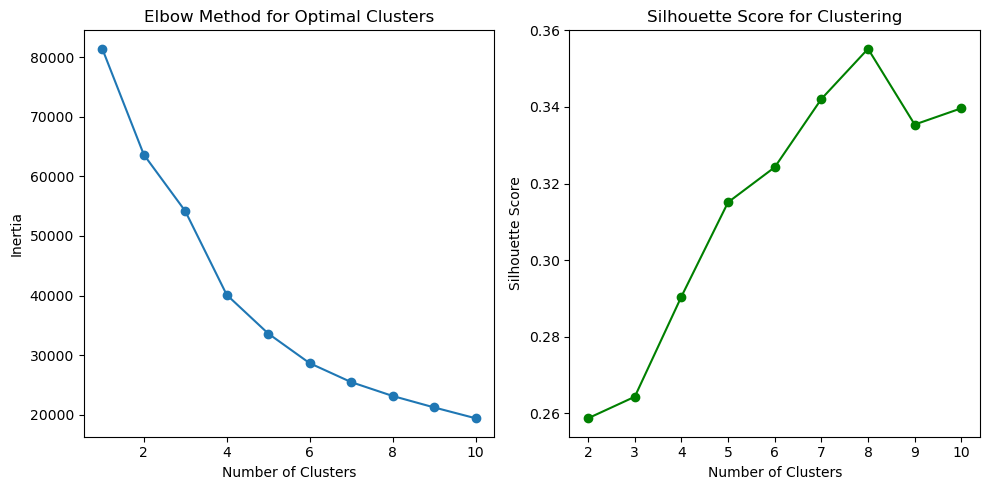

C:\Users\Kuldeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


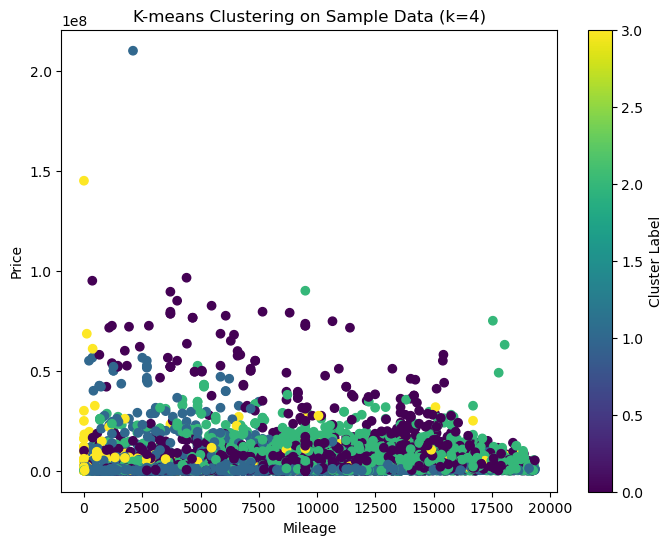

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize the StandardScaler
scaler = StandardScaler()

# Take a random sample of 10% of the data
sample_df = df3.sample(frac=0.1, random_state=42)

# Standardize the sample features
features_sample = sample_df[['category', 'Condition', 'Brand', 'Mileage', 'Model']]
features_scaled_sample = scaler.fit_transform(features_sample)

# Elbow Method to determine the optimal number of clusters
inertia = []  # To store inertia values
silhouette_scores = []  # To store silhouette scores

# Experiment with 1 to 10 clusters
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled_sample)
    inertia.append(kmeans.inertia_)
    
    if n_clusters > 1:
        silhouette_scores.append(silhouette_score(features_scaled_sample, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score for Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters (from the plots)
optimal_clusters = 4  # Use the optimal value chosen from the elbow and silhouette score plots

# Apply K-means with the optimal number of clusters
kmeans_sample = KMeans(n_clusters=optimal_clusters, random_state=42)
sample_df['Cluster'] = kmeans_sample.fit_predict(features_scaled_sample)

# Visualize the clusters in the sample (using 'Mileage' and 'price' for visualization)
plt.figure(figsize=(8, 6))
plt.scatter(sample_df['Mileage'], sample_df['price'], c=sample_df['Cluster'], cmap='viridis')
plt.title(f'K-means Clustering on Sample Data (k={optimal_clusters})')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
The provided scatter plot visualizes K-means clustering results for a dataset containing "Mileage" (x-axis) and "Price" (y-axis). The clusters are represented by distinct colors, and the color bar on the side indicates the cluster labels ranging from 0 to 3 (as 
k=4).

Key Observations:
Cluster Distribution:

Data points are grouped into four clusters based on the K-means algorithm.
The clusters are relatively well-separated, especially near the lower price and mileage ranges.
Price Outliers:

There are a few significant outliers in the "Price" variable (e.g., points near 1.5e8 and 2.0e8).
These outliers likely belong to separate clusters or skew the clustering results.
Mileage and Price Relationship:

Most data points are concentrated within lower mileage ranges (0−10,0000−10,000).
Price shows a high concentration near lower values but increases sporadically for certain mileage ranges.
Cluster Characteristics:

Dark purple (Cluster 0) seems to dominate the lower mileage and price ranges.
Yellow (Cluster 3) is more prominent in regions of higher price or more scattered distributions.
Light green and teal clusters (Clusters 1 and 2) are distributed more sparsely, capturing edge cases or transitional regions.
Conclusion:
The clustering suggests distinct patterns between price and mileage:
Low mileage & low price dominate the dataset, represented by one major cluster.
Outliers significantly impact the clustering, indicating the need for preprocessing (e.g., outlier removal or normalization).
Higher price ranges appear more scattered, likely influenced by additional unobserved factors beyond mileage. 